**BITCOIN**

#### Find formula


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Bitcoin Historical Data.csv', header=0, delimiter=',')
df["Date"] = pd.to_datetime(df["Date"]).astype(int) / 10**9

x = np.array(df["Date"])
y = np.array(df["Price"])

In [ ]:
import numpy as np

def gauss_newton(X, y, B0, tol=1e-6, max_iter=1000):
  J = np.zeros((len(X), len(B0)))
  n_iter = 0
  while True:
    n_iter += 1
    rC1 = -(X / (B0[1] + X))
    rC2 = (B0[0] * X / (B0[1] + X) ** 2)

    J[:, 0] = rC1
    J[:, 1] = rC2

    # Compute SSE
    SSE = y - ((B0[0] * X) / (B0[1] + X))

    # Compute inverse of (J^T * J)
    t1 = np.linalg.inv(np.dot(J.T, J))

    # Compute t1 * J^T
    t2 = np.dot(t1, J.T)

    # Compute t2 * SSE
    t3 = np.dot(t2, SSE)

    # Update parameters
    B1 = B0 - t3

    # Check for convergence
    if np.max(np.abs(B1 - B0)) <= tol:
      break

    # Update parameters for next iteration
    B0 = B1

    # Check for maximum iterations
    if n_iter >= max_iter:
      break
    return B0, n_iter


In [ ]:
#1. Khởi tạo giá trị ban đầu
initial_guess = np.array([1.0, 1.0])
#2. Khởi tạo ma trận Jacobian
J = np.zeros((len(x),len(initial_guess)))
#3. Khởi tạo giá trị Iter
i = 0

B_opt, n_iter = gauss_newton(x, y, initial_guess)
C1, C2 = B_opt
print(f'Constant C1 = {C1:.4f}, Constant C2 = {C2:.4f}, Number of iterations = {n_iter}')

Constant C1 = 201910.7452, Constant C2 = 288768907614142.6250, Number of iterations = 1


#### Visualization


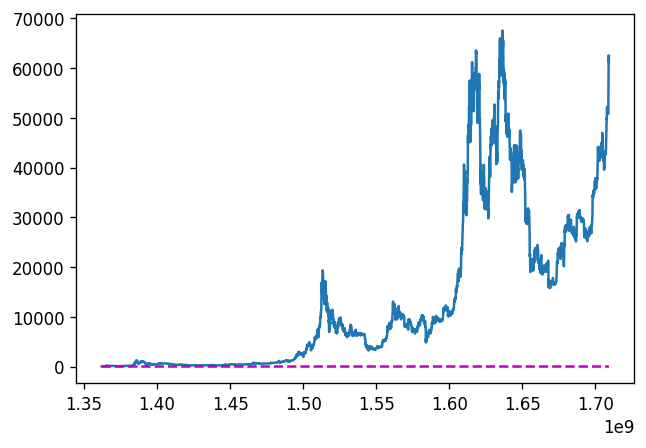

In [ ]:
import matplotlib.pyplot as plt

pred = (C1*x)/(C2+x)
plt.figure(1, figsize=(6,4), dpi=120)
plt.plot(x, y)
plt.plot(x,pred, "--m", label='Predict')